In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from progress_bar import progress_bar
from Game import game

done


In [2]:
actions = ["u", "d", "l", "r"]

In [3]:
env = game(game_size=10)
locations_encoded = np.zeros((env.game_size+1, env.game_size+1)) 
i = 0
for x in range(env.game_size+1):
    for y in range(env.game_size+1):
        locations_encoded[x, y] = i
        i += 1

In [4]:
# 4 -> # of actions
# 2 sizes multiplied is location of snake head and apple
Q = np.zeros((
    (env.game_size+1)**2,
    (env.game_size+1)**2,
    len(actions), 
))

In [5]:
def encode_position(position):
    x = position[0]
    y = position[1]
    try:
        locations_encoded[x, :]
    except IndexError:
        x -=1
    try:
        locations_encoded[x, y]
    except IndexError:
        y -=1
        
    return int(locations_encoded[x, y])

In [6]:
def convert_action(action):
    if action == "u":
        return [0, 1]
    elif action == "d":
        return [0, -1]
    elif action == "r":
        return [1, 0]
    else:
        return [-1, 0]

In [7]:
def get_action(snake_pos_encoded, apple_pos_encoded, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Sample random action
        action = random.randint(0, len(actions)-1)
    else:
        if [i for i in Q[snake_pos_encoded, apple_pos_encoded, :] if i != 0]:
            # Get value from Q-table
            action = np.argmax(Q[snake_pos_encoded, apple_pos_encoded, :])
        else:
            # Choose action randomly if none of the actions in the Q-table have a value
            # Prevents the same action from being chosen when given an empty set of values for a state
            action = random.randint(0, len(actions)-1)
    
    return action

In [8]:
rewards = []
EPISODES = 100000
MAX_STEPS = 100
LEARNING_RATE = 0.81
GAMMA = 0.96
epsilon = 0.9
render = False

for episode in range(EPISODES):
    env = game(game_size=10)
    current_reward = 0
    if episode % 1000 == 0:
        clear_output()
        progress_bar(int(episode/EPISODES*100))
    for _ in range(MAX_STEPS):
        head_pos = env.snake.head.pos
        apple = env.apple
        
        snake_pos_encoded = encode_position(head_pos)
        apple_pos_encoded = encode_position(apple)
        if render:
            env.draw()
        
        action = get_action(snake_pos_encoded, apple_pos_encoded, epsilon)
        
        # Take action
        reward, new_env, end = env.run_cycle(actions[action])
        current_reward += reward
        
        # Update Q-values
        next_head_pos = new_env.snake.head.pos
        next_apple = new_env.apple
        next_snake_pos_encoded = encode_position(next_head_pos)
        next_apple_pos_encoded = encode_position(next_apple)
        Q[snake_pos_encoded, 
          apple_pos_encoded, 
          action] = Q[snake_pos_encoded, apple_pos_encoded, action] + LEARNING_RATE *(
                        reward + GAMMA * np.max(Q[next_snake_pos_encoded, next_apple_pos_encoded, :]) 
                        - Q[snake_pos_encoded, apple_pos_encoded, action]
                    ) 
        
        env = new_env
        if end:
            rewards.append(current_reward)
            if epsilon > 0:
                epsilon -= 0.001
            break

progress_bar(100, True)
            

[===================-] 99%
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAA

Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
A

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AA

AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AA

AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAA

Text(0.5, 0, "Episodes (100's)")

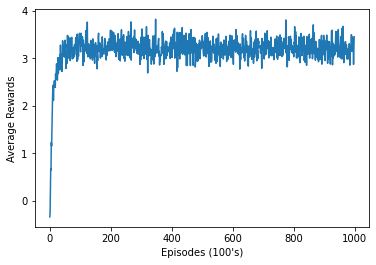

In [9]:
def get_avg(vals):
    return sum(vals)/len(vals)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_avg(rewards[i:i+100]))
    
plt.plot(avg_rewards)
plt.ylabel('Average Rewards')
plt.xlabel("Episodes (100's)")

In [13]:
def get_prediction(env):
    actions = ["u", "d", "l", "r"]
    head_pos = env.snake.head.pos
    apple = env.apple
    snake_pos_encoded = encode_position(head_pos)
    apple_pos_encoded = encode_position(apple)
    
    action = get_action(snake_pos_encoded, apple_pos_encoded, epsilon)
        
    return actions[action]      

In [22]:
import time
import os
env = game(game_size=10)
env.draw()
end = False
score = 0
while not end:
    action = get_prediction(env)
    reward, _, end = env.run_cycle(action)
    if reward == 0.7:
        score += 1
    #clear_output()
    #env.draw(score=score)
    time.sleep(0.1)
print ("Done")


AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
Done
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
Done
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
Done
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
Done
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
Done
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
Done
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
Done
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
Snake collision
Done
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AAAA
AA

In [15]:
print (env.snake.head.pos)

[0, 7]
